In [3]:
import numpy as np
import random
import scipy
import networkx as nx 
import matplotlib.pyplot as plt
import sys
sys.path.append('../../../')
from lcs import *

# def generate_hypergraph_bipartite_edge_list(N_groups, N_inds, p_dist, g_dist,seed = None):
#     """
#     generate_hypergraph_bipartite_edge_list(): generates a hypergraph in the style of Newman's model in "Community Structure in social and biological networks" 
#     inputs:
#         N_groups: the number of groups or cliques to create
#         N_inds: the number of individuals to create(may be less than this total)
#         p_dist: The distribution of clique sizes, must be from numpy.random
#         g_dist: The distribution of number of cliques belonged to per individual
#         seed: seed for pseudorandom number generator
#     output:
#         edge_list: the edge list for a bi-partite graph. The first n-indices represent the clique edges and the rest represent individuals
#     """

#     #generate rng with seed 
#     if seed is not None:
#         rng = np.random.default_rng(seed)

#     chairs = []
#     butts = []

#     # generate chairs
#     for i in range(1, N_groups + 1):
#         p_n = p_dist.rvs()  # select the number of chairs in clique i
#         chairs.extend([i for _ in range(int(p_n))])  # add p_n chairs belonging to clique i

#     for i in range(1, N_inds + 1):
#         g_m = g_dist.rvs() + 1  # select the number of butts in clique i
#         g_m = int(g_m if len(butts) + g_m <= len(chairs) else len(chairs) - len(butts))  # pull a random length or select a length to make the two lists equal if we are bout to go over 
#         butts.extend([i for _ in range(g_m)])  # add g_m butts to individuals i

#     chairs = [chair + N_inds for chair in chairs]

#     # shuffle the lists    
#     rng.shuffle(chairs,seed = seed)
#     rng.shuffle(butts,seed = seed)

#     # generate edge_list 
#     edge_list = list(zip(chairs, butts))
#     edge_list = [(int(edge[0]), int(edge[1])) for edge in edge_list]

#     # create vertex meta_data, if the index is a clique, give it a 0, if the vertex is in individual give it a 1    
#     vertex_attributes = {i: 1 if i <= max(butts) else 2 for i in set(chairs + butts)}

#     return edge_list, vertex_attributes



# def bipartite_graph(edge_list):
#     B = nx.Graph()
#     a = np.vstack(edge_list)
#     node_list1,node_list2 = np.unique(a[:,1]),np.unique(a[:,0])
#     B.add_nodes_from(node_list1,bipartite=0)
#     B.add_nodes_from(node_list2,bipartite=1)
#     B.add_edges_from(edge_list)
#     return B


# def generate_clustered_unipartite(n_groups,n_ind,p_dist,g_dist,**kwargs):
#     edge_list,vertex_attributes = generate_hypergraph_bipartite_edge_list(10,100,my_p_dist,my_g_dist,**kwargs)#generate bipartite graph
#     u = unipartite_projection(edge_list)#project to unipartite
#     return u 

In [4]:
unipartite_projection = generate_clustered_unipartite(10,100,my_p_dist,my_g_dist)

NameError: name 'my_p_dist' is not defined

In [32]:
my_p_dist = scipy.stats.binom(30,0.5)
my_g_dist = scipy.stats.binom(5,0.5)


edge_list,vertex_attributes = generate_hypergraph_bipartite_edge_list(10,100,my_p_dist,my_g_dist)#generate bipartite graph
B = bipartite_graph(edge_list)


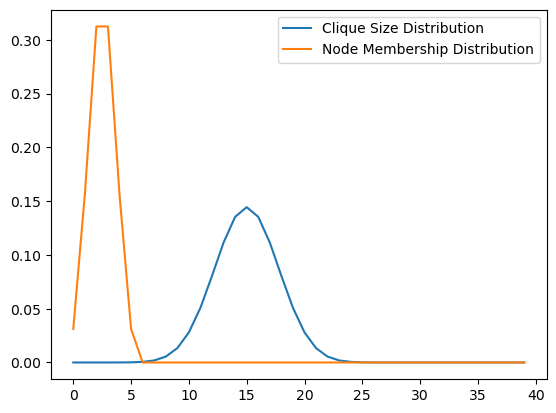

In [33]:
#plot my_p_dist
x = np.arange(0, 40, 1)
fig,ax = plt.subplots()
ax.plot(x, my_p_dist.pmf(x),label =  "Clique Size Distribution")
ax.plot(x, my_g_dist.pmf(x),label =  "Node Membership Distribution")
plt.legend()


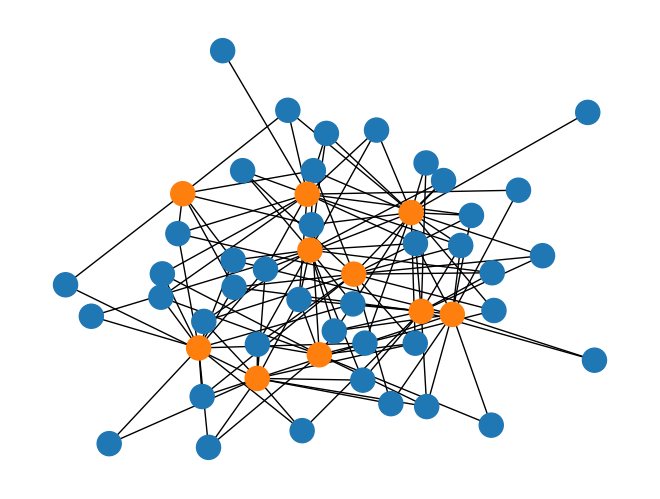

In [35]:
color_map = ['C0' if vertex_attributes[node] == 1 else 'C1' for node in B.nodes()]
nx.draw(B,node_color = color_map)

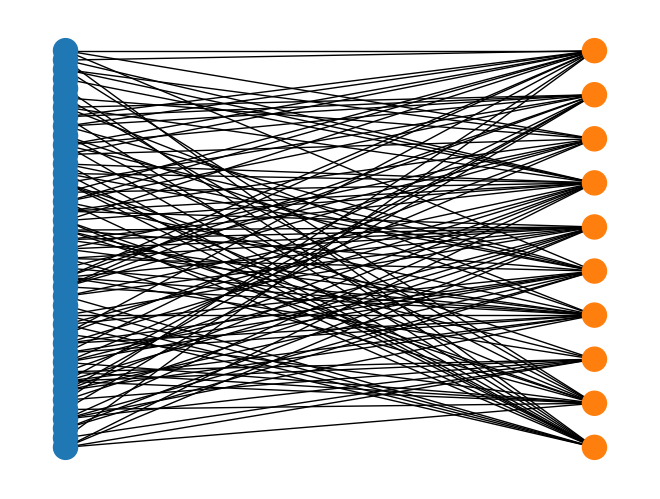

In [10]:

top = nx.bipartite.sets(B)[0]
pos = nx.bipartite_layout(B, top)
nx.draw(B, pos=pos,node_color = color_map)
